In [3]:
import kagglehub

path = kagglehub.dataset_download("arhamrumi/amazon-product-reviews")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'amazon-product-reviews' dataset.
Path to dataset files: /kaggle/input/amazon-product-reviews


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_csv(f"{path}/Reviews.csv")

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568454 entries, 0 to 568453
Data columns (total 10 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   Id                      568454 non-null  int64 
 1   ProductId               568454 non-null  object
 2   UserId                  568454 non-null  object
 3   ProfileName             568428 non-null  object
 4   HelpfulnessNumerator    568454 non-null  int64 
 5   HelpfulnessDenominator  568454 non-null  int64 
 6   Score                   568454 non-null  int64 
 7   Time                    568454 non-null  int64 
 8   Summary                 568427 non-null  object
 9   Text                    568454 non-null  object
dtypes: int64(5), object(5)
memory usage: 43.4+ MB


In [7]:
df['Helpful_Votes'] = df['HelpfulnessNumerator']
df['Total_Votes'] = df['HelpfulnessDenominator']
df.drop(['HelpfulnessNumerator', 'HelpfulnessDenominator'], axis=1, inplace=True)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568454 entries, 0 to 568453
Data columns (total 10 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   Id             568454 non-null  int64 
 1   ProductId      568454 non-null  object
 2   UserId         568454 non-null  object
 3   ProfileName    568428 non-null  object
 4   Score          568454 non-null  int64 
 5   Time           568454 non-null  int64 
 6   Summary        568427 non-null  object
 7   Text           568454 non-null  object
 8   Helpful_Votes  568454 non-null  int64 
 9   Total_Votes    568454 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 43.4+ MB


In [9]:
df.head()

,Id,ProductId,UserId,ProfileName,Score,Time,Summary,Text,Helpful_Votes,Total_Votes
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,1,1
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,0,0
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,1,1
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,3,3
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",5,1350777600,Great taffy,Great taffy at a great price. There was a wid...,0,0


In [10]:
len(df['ProductId'].unique())

74258

In [11]:
df.isnull().sum()

,0
Id,0
ProductId,0
UserId,0
ProfileName,26
Score,0
Time,0
Summary,27
Text,0
Helpful_Votes,0
Total_Votes,0


In [12]:
length=len(df)

In [13]:
missingV1=df[['ProfileName','Summary']].isnull().sum()

percenatge=[]
for value in missingV1:
    text_form=f'{value/length*100:.5f}%'
    percenatge.append(text_form)

In [14]:
missing_values=pd.DataFrame({'missing values':missingV1,'percenatges':percenatge,'total number of rows':length})

In [15]:
missing_values

,missing values,percenatges,total number of rows
ProfileName,26,0.00457%,568454
Summary,27,0.00475%,568454


In [16]:
df.duplicated().sum()

np.int64(0)

In [17]:
num_col=df[['Helpful_Votes','Total_Votes']]

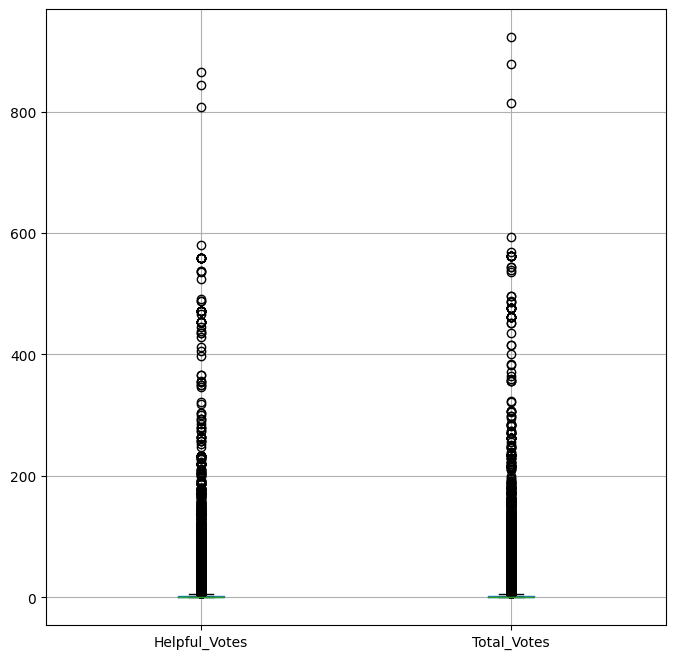

In [18]:
num_col.boxplot(figsize=(8,8))
plt.show()

In [19]:
IQR = num_col.quantile(0.75) - num_col.quantile(0.25)
IQR

,0
Helpful_Votes,2.0
Total_Votes,2.0


In [20]:
lower_bound = num_col.quantile(0.25) - 1.5 * IQR
upper_bound = num_col.quantile(0.75) + 1.5 * IQR

outliers = num_col[(num_col < lower_bound) | (num_col > upper_bound)]
outliers.dropna(how='all').info()

<class 'pandas.core.frame.DataFrame'>
Index: 52643 entries, 32 to 568436
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Helpful_Votes  37002 non-null  float64
 1   Total_Votes    52643 non-null  float64
dtypes: float64(2)
memory usage: 1.2 MB


In [21]:
x = df.groupby('ProductId')['Helpful_Votes'].sum().sort_values(ascending=False)
x

,Helpful_Votes
ProductId,
B00012182G,3989
B000FI4O90,3535
B003B3OOPA,2944
B000VK08OC,2630
B001LQCOIS,2074
...,...
B009SF0TN6,0
B009RE0Y5G,0
B009PIEW3O,0


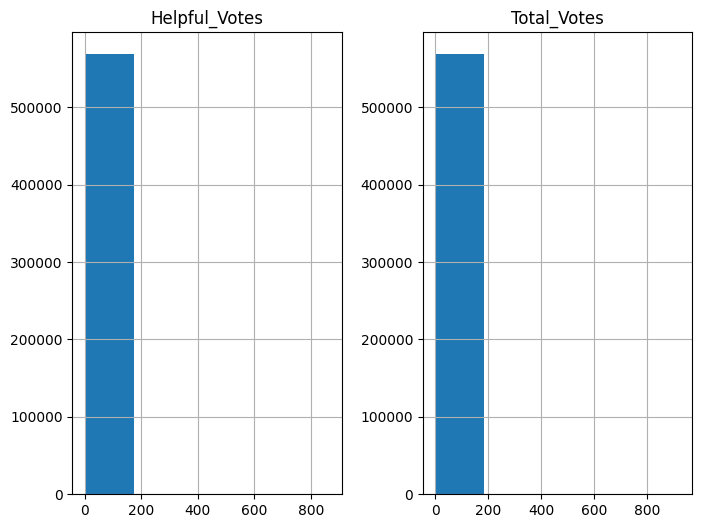

In [22]:
num_col.hist(bins = 5,figsize=(8,6))
plt.show()

## CLEANING THE TEXT

In [23]:
#69,40,21

In [24]:
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [25]:
z = df.head(100000).copy()

In [26]:
stop_words = set(stopwords.words("english"))
pattern = re.compile(r'[^a-z\s]')
html_pattern = re.compile(r'<.*?>')
def clean_text_function(text):
    text = str(text).lower()
    text = html_pattern.sub(' ', text)
    text = pattern.sub('', text)
    tokens = [word for word in text.split() if word not in stop_words]
    return " ".join(tokens)

In [27]:
z['clean_text'] = z['Text'].apply(clean_text_function)
z['tokens'] = z['clean_text'].apply(lambda b: b.split())

In [28]:
clean = z['clean_text']

In [29]:
cleaned_text = []
for i in clean :
    text = re.sub(r'(.)\1{2,}', r'\1', i)
    cleaned_text.append(text)

In [30]:
cleaned_text[69]

'so deliscious bad ate em fast gained pds fault'

In [31]:
cleaned_text[21]

'bought husband currently overseas loves apparently staff likes also generous amounts twizzlers ounce bag well worth price twizzlers strawberry ounce bags pack'

In [32]:
cleaned_text[40]

'variety packs taste great every morning cents per meal dont understand everyone earth isnt buying stuff maple brown sugar terrific followed apples cinnamon followed regular dont get tired ole thing taste great boil water small pot empty packet bowl pour boiling water watch expand x size taste really good takes minutes prepare sure everyone earth isnt convenient healthy quick excellent quality extremely cheap'

In [33]:
import spacy
tokens_root = []
nlp = spacy.load("en_core_web_sm")
# Define the components we don't need
# 'ner' and 'parser' are the slowest parts and aren't needed for lemmas
unwanted_pipes = ["ner", "parser"]

for doc in nlp.pipe(cleaned_text, disable=unwanted_pipes, batch_size=2000):
    tokens = [token.lemma_ for token in doc]
    tokens_root.append(tokens)
#5m runtime

In [34]:
len(tokens_root)

100000

In [ ]:
tokens_root[69]

In [36]:
clean = pd.Series(clean)

In [37]:
df['Text'] = clean

In [38]:
df['Text'].head()

,Text
0,bought several vitality canned dog food produc...
1,product arrived labeled jumbo salted peanutsth...
2,confection around centuries light pillowy citr...
3,looking secret ingredient robitussin believe f...
4,great taffy great price wide assortment yummy ...


In [39]:
#df.dropna(inplace=True)

**For the comparision between the model performance on Labeled Data and Unlabeled data**

In [40]:
df['Tag'] = np.where(df['Score'] >= 4, 1, -1)  #1 for positive, -1 for negative
df['Tag'] = np.where(df['Score'] == 3, 0, df['Tag']) #0 for neutral

In [41]:
df.groupby('Tag')['Score'].count()

,Score
Tag,
-1,82037
0,42640
1,443777


In [42]:
!pip install gensim

In [43]:
from gensim.models import Word2Vec
import multiprocessing

In [44]:
cores = multiprocessing.cpu_count()
w2v_model = Word2Vec(
    sentences=tokens_root,
    vector_size=100,
    window=5,
    min_count=2,
    workers=cores,
    epochs=10
)
#2m runtime

In [45]:
w2v_model.save("word2vec_model.bin")

In [46]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

tokenizer = Tokenizer()
tokenizer.fit_on_texts(tokens_root)

sequences = tokenizer.texts_to_sequences(tokens_root)

maxlen = 100
embedding_dim = 100

X = pad_sequences(sequences, maxlen=maxlen)

y = df['Tag'].head(100000).values
y = pd.get_dummies(y).values

vocab_size = len(tokenizer.word_index) + 1

embedding_matrix = np.zeros((vocab_size, embedding_dim))
for word, i in tokenizer.word_index.items():
    if word in w2v_model.wv:
        embedding_matrix[i] = w2v_model.wv[word]


In [47]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = Sequential()


model.add(Embedding(input_dim=vocab_size,
                    output_dim=embedding_dim,
                    weights=[embedding_matrix],
                    input_length=maxlen,
                    trainable=False))

model.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2))

model.add(Dense(3, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

history = model.fit(X_train, y_train,
                    epochs=5,
                    batch_size=128,
                    validation_data=(X_test, y_test))
#11m runtime

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │     6,928,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,928,200 (26.43 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 6,928,200 (26.43 MB)

Epoch 1/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 173s 257ms/step - accuracy: 0.7936 - loss: 0.5514 - val_accuracy: 0.8381 - val_loss: 0.4289
Epoch 2/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 147s 180ms/step - accuracy: 0.8371 - loss: 0.4309 - val_accuracy: 0.8486 - val_loss: 0.4025
Epoch 3/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 114s 182ms/step - accuracy: 0.8459 - loss: 0.4084 - val_accuracy: 0.8500 - val_loss: 0.3946
Epoch 4/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 115s 184ms/step - accuracy: 0.8558 - loss: 0.3794 - val_accuracy: 0.8530 - val_loss: 0.3868
Epoch 5/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 113s 181ms/step - accuracy: 0.8614 - loss: 0.3681 - val_accuracy: 0.8593 - val_loss: 0.3787


In [48]:
model.trainable = True
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

history = model.fit(X_train, y_train,
                    epochs=4,
                    batch_size=128,
                    validation_data=(X_test, y_test))
#10m runtime

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ (128, 100, 100)        │     6,928,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ (128, 128)             │       117,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (128, 3)               │           387 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,045,835 (26.88 MB)

 Trainable params: 117,635 (459.51 KB)

 Non-trainable params: 6,928,200 (26.43 MB)

Epoch 1/4
625/625 ━━━━━━━━━━━━━━━━━━━━ 184s 290ms/step - accuracy: 0.8671 - loss: 0.3494 - val_accuracy: 0.8586 - val_loss: 0.3801
Epoch 2/4
625/625 ━━━━━━━━━━━━━━━━━━━━ 136s 183ms/step - accuracy: 0.8725 - loss: 0.3393 - val_accuracy: 0.8601 - val_loss: 0.3766
Epoch 3/4
625/625 ━━━━━━━━━━━━━━━━━━━━ 165s 219ms/step - accuracy: 0.8766 - loss: 0.3264 - val_accuracy: 0.8610 - val_loss: 0.3868
Epoch 4/4
625/625 ━━━━━━━━━━━━━━━━━━━━ 117s 180ms/step - accuracy: 0.8802 - loss: 0.3146 - val_accuracy: 0.8593 - val_loss: 0.3741


In [49]:
from transformers import BertTokenizer, TFBertForSequenceClassification

texts = df['Text'].head(100000).astype(str).tolist()
labels = pd.get_dummies(df['Tag'].head(100000)).values

tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

encodings = tokenizer(texts,
                      truncation=True,
                      padding=True,
                      max_length=100,
                      return_tensors='tf')
input_ids = encodings['input_ids']
attention_masks = encodings['attention_mask']

X_train_ids, X_test_ids, X_train_mask, X_test_mask, y_train, y_test = train_test_split(
    input_ids.numpy(),
    attention_masks.numpy(),
    labels,
    test_size=0.2,
    random_state=42
)


/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(
TensorFlow and JAX classes are deprecated and will be removed in Transformers v5. We recommend migrating to PyTorch classes or pinning your version of Transformers.


**Truncation=True:**



The Problem: BERT has a strict limit on how many tokens it can accept (usually 512). Also, you set a specific max_length=100.
What it does: If a review is longer than 100 tokens, this parameter cuts off (truncates) the end of the sentence so it fits. Without this, the code would crash on long reviews.


---



**padding=True:**

The Problem: Neural networks (like BERT) need rectangular inputs (matrices). You can't have one row with 5 numbers and the next with 100.

What it does: If a review is shorter than the longest review in the batch (or max_length), this adds special "pad tokens" (usually zeros) to the end until it reaches the required length. This ensures every input has the exact same size.

In [ ]:
bert = TFBertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=3)

optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001)
loss = tf.keras.losses.CategoricalCrossentropy(from_logits=True)

bert.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])

bert.summary()

history = bert.fit(
    [X_train_ids, X_train_mask],
    y_train,
    epochs=3,  # BERT learns very fast, 2-3 epochs is usually enough
    batch_size=16,
    validation_data=([X_test_ids, X_test_mask], y_test)
)